In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from matplotlib.animation import PillowWriter
from sympy import symbols
import sympy as smp

In [2]:
# l = 1
m1, m2, g, t = symbols('m_1 m_2 g t')
the1, the2 = symbols(r'\theta_1 \theta_2',cls=smp.Function)

In [3]:
the1 = the1(t)
the2 = the2(t)
the1_d = the1.diff(t)
the2_d = the2.diff(t)
the1_dd = the1_d.diff(t)
the2_dd = the2_d.diff(t)

In [4]:
L, T, V = symbols('L T V',cls=smp.Function)
T = T(the1_d, the2_d)
V = V(the1, the2)
L = L(T, V)
T = m1*the1_d**2 + m2*the2_d**2
V = -g*(m1*smp.sin(the1) + m2*(smp.sin(the2)+smp.sin(the1)))
L = T-V

In [5]:
LE1 = L.diff(the1)-L.diff(the1_d).diff(t)
LE1.simplify()
LE2 = L.diff(the2)-L.diff(the2_d).diff(t)
LE2.simplify()

m_2*(g*cos(\theta_2(t)) - 2*Derivative(\theta_2(t), (t, 2)))

In [6]:
sols = smp.solve([LE1,LE2],[the1_dd,the2_dd],rational=False)

In [8]:
dw1dt = smp.lambdify((m1,m2,g,the1,the2,the1_d,the2_d),sols[the1_dd])
dthe1dt = smp.lambdify(the1_d, the1_d)
dw2dt = smp.lambdify((m1,m2,g,the1,the2,the1_d,the2_d),sols[the2_dd])
dthe2dt = smp.lambdify(the2_d, the2_d)

In [14]:
def dydt(y,t):
    the1, the2, the1_d, the2_d = y
    return [dthe1dt(the1_d), dthe2dt(the2_d), 
            dw1dt(m1,m2,g,the1,the2,the1_d,the2_d),
            dw2dt(m1,m2,g,the1,the2,the1_d,the2_d)]

In [40]:
m1 = 1
m2 = 2
g = 9.81
y0 = [np.pi/4,np.pi/6,0,0]
duration = 100
fps = 24
total_frames = duration * fps
t = np.linspace(1,duration,total_frames)
y = odeint(dydt,y0,t)

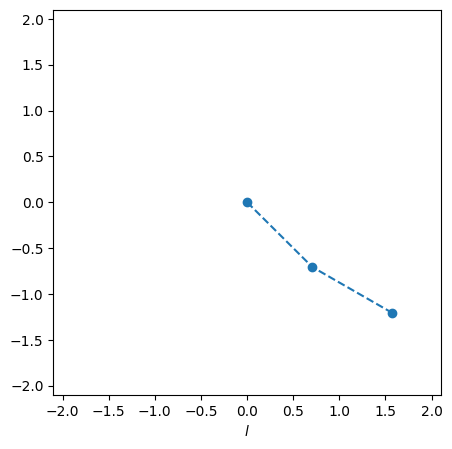

In [41]:
fig = plt.figure(figsize=(5,5))
plt.xlim(-2.1,2.1)
plt.ylim(-2.1,2.1)
plt.gca().set_xlabel('$l$')
x1 = np.cos(y[:,0])
y1 = -np.sin(y[:,0])
x2 = x1+np.cos(y[:,1])
y2 = y1-np.sin(y[:,1])
pend, = plt.plot([0,x1[0],x2[0]],[0,y1[0],y2[0]],'--o')

def anim(i):
    pend.set_data([0,x1[i],x2[i]],[0,y1[i],y2[i]])
    print('%d/%d'%(i+1,total_frames),end='\r')

ani = animation.FuncAnimation(fig,anim,total_frames)
ani.save('dpen.gif','pillow',fps=fps)